In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("data\stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isnull()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df["total"] = df["math_score"]+df["reading_score"]+ df["writing_score"]
df["average"] = df["total"]/3
df.head()




,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df["reading_score"] == 100].shape[0]
writing_full = df[df["writing_score"] == 100].shape[0]
math_full = df[df["math_score"] == 100].shape[0]

print(f"The number of students who got full marks in math: {math_full}")
print(f"The number of students who got full marks in reading: {reading_full}")
print(f"The number of students who got full marks in writing: {writing_full}")


The number of students who got full marks in math: 7
The number of students who got full marks in reading: 17
The number of students who got full marks in writing: 14


In [14]:
reading_less_20 = df[df["reading_score"] < 20].shape[0]
writing_less_20 = df[df["writing_score"] < 20].shape[0]
math_less_20 = df[df["math_score"] < 20].shape[0]

print(f"The number of students who got less than 20 in math: {math_less_20}")
print(f"The number of students who got less than 20 in reading: {reading_less_20}")
print(f"The number of students who got less than 20 in writing: {writing_less_20}") 

The number of students who got less than 20 in math: 4
The number of students who got less than 20 in reading: 1
The number of students who got less than 20 in writing: 3


<Axes: xlabel='total', ylabel='Count'>

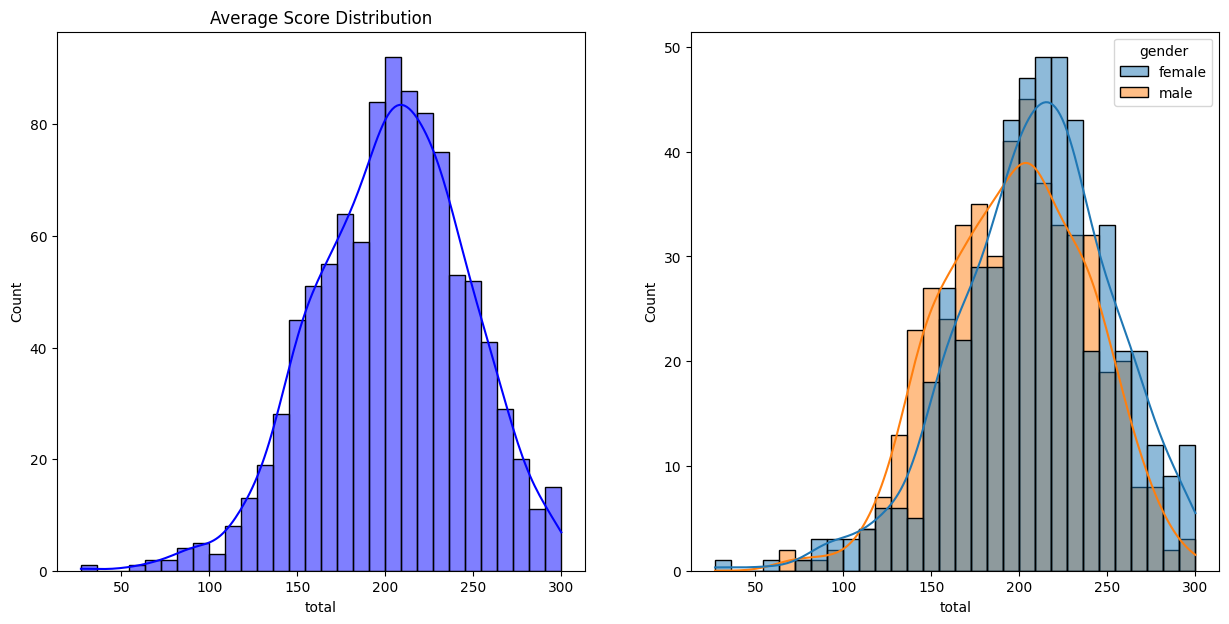

In [24]:
fix,axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="total",bins=30 ,kde=True, color="blue")
plt.title("Average Score Distribution")
plt.subplot(122)
sns.histplot(data=df,x="total",bins=30 ,kde=True, hue="gender")